In [1]:
import pandas as pd
import numpy as np
import tldextract
import re
import pycountry

country_tlds = {
     country.alpha_2.lower()
    for country in pycountry.countries
}

In [2]:
df = pd.read_excel('PhishDataset/data_imbal - 55000.xlsx')
popular_websites_df = pd.read_csv('OtherData/ranked_domains.csv')

In [3]:
ext = popular_websites_df['Domain'].apply(tldextract.extract)
popular_websites_df['domains'] = ext.apply(lambda x: re.split(r'[.-]', x.domain))
popular_websites_df['suffix'] = ext.apply(lambda x: re.split(r'[.-]', x.suffix))

In [4]:
df['length'] = df['URLs'].str.len()
df['#slash'] = df['URLs'].str.count('/')
df['#dot'] = df['URLs'].str.count(r'\.')
df['#dash'] = df['URLs'].str.count('-')
df['is_https'] = df['URLs'].str.split(':', n=1).str[0].eq('https').astype(int)
df['#digits_in_url'] = df['URLs'].apply(lambda x: len(re.findall(r'\d', x)))

In [37]:
ext = df['URLs'].apply(tldextract.extract)

df['subdomain'] = ext.apply(lambda x: set(re.split(r'[.-]', x.subdomain)))
df['domains'] = ext.apply(lambda x: set(re.split(r'[.-]', x.domain)))
df['suffix'] = ext.apply(lambda x: set(re.split(r'[.-]', x.suffix)))

df['#subdomain'] = ext.apply(lambda x: len(re.split(r'[.-]', x.subdomain)))
df['#domains'] = ext.apply(lambda x: len(re.split(r'[.-]', x.domain)))
df['#suffix'] = ext.apply(lambda x: len(re.split(r'[.-]', x.suffix)))

df['domain_length'] = ext.apply(lambda x: len(x.domain) + len(x.suffix) +  len(x.subdomain))

df['domain_length_ratio'] = ext.apply(lambda x: len(x.domain) + len(x.suffix) +  len(x.subdomain)) / df['length']


# df['domains_div_dash'] = ext.apply(lambda x: set(re.split(r'[.-]', x.domain)))
# df['domains_div_dash'] = ext.apply(lambda x: set(re.split(r'[.-]', x.domain)))

df['#digits_in_domain'] = ext.apply(lambda x: len(re.findall(r'\d', x.domain)))
df['#digits_in_subdomain'] = ext.apply(lambda x: len(re.findall(r'\d', x.subdomain)))
df['#digits_in_suffix'] = ext.apply(lambda x: len(re.findall(r'\d', x.subdomain)))

df['is_www']= (df['subdomain'] == {'www'}).astype(int)
df['is_com']= (df['suffix'] == {'com'}).astype(int)
df['has_com'] = df['suffix'].apply(lambda x: int('com' in x))
df['has_org'] = df['suffix'].apply(lambda x: int('org' in x))
df['has_freaky'] = df['suffix'].apply(lambda x: len(x & {'xyz', 'online', 'top', 'shop', 'site', 'icu', 'store', 'cyou', 'vip', 'live'}) > 0)

df['has_country_tld_in_domain'] = df['domains'].apply(lambda x: len(x & set(country_tlds)))
df['has_country_tld_in_suffix'] = df['suffix'].apply(lambda x: len(x & set(country_tlds)))
df['has_country_tld_in_subdomain'] = df['subdomain'].apply(lambda x: len(x & set(country_tlds)))

df['longest_segment'] = df['domains'].apply(lambda x: len(max(x, key=len)))
df['shortest_segment'] = df['domains'].apply(lambda x: len(min(x, key=len)))

In [6]:
nested = ((popular_websites_df['domains']).to_list())
flat = [item for sublist in nested for item in sublist]
popular_domains = set(flat)
popular_domains.discard('www')

nested = ((popular_websites_df['suffix']).to_list())
flat = [item for sublist in nested for item in sublist]
popular_suffixs = set(flat)

In [7]:
df['popular_domain_in_domains'] = df['domains'].apply(lambda x: len(x & popular_domains))
df['popular_domain_in_subdomains'] = df['subdomain'].apply(lambda x: len(x & popular_domains))
df['popular_suffx_in_domains'] = df['domains'].apply(lambda x: len(x & popular_suffixs))
df['popular_suffix_in_subdomains'] = df['subdomain'].apply(lambda x: len(x & popular_suffixs))

In [8]:
display(df[df['URLs']=='https://d2641d49146b4775a4faefe8e7a3d2c7-dot-gle9392420309493993.rj.r.appspot.com/'])

,Labels,URLs,length,#slash,#dot,#dash,is_https,#digits_in_url,subdomain,domains,...,has_com,has_org,has_freaky,has_country_tld,longest_segment,shortest_segment,popular_domain_in_domains,popular_domain_in_subdomains,popular_suffx_in_domains,popular_suffix_in_subdomains
2093,1,https://d2641d49146b4775a4faefe8e7a3d2c7-dot-g...,82,3,4,2,1,35,"{rj, r, d2641d49146b4775a4faefe8e7a3d2c7, dot,...",{appspot},...,1,0,False,0,7,7,0,0,0,0


In [9]:
display(df)

,Labels,URLs,length,#slash,#dot,#dash,is_https,#digits_in_url,subdomain,domains,...,has_com,has_org,has_freaky,has_country_tld,longest_segment,shortest_segment,popular_domain_in_domains,popular_domain_in_subdomains,popular_suffx_in_domains,popular_suffix_in_subdomains
0,1,https://www.ujhyjhujhyjhyuj.ga/CC_POSTALE/f2a83/,48,5,2,0,1,3,{www},{ujhyjhujhyjhyuj},...,0,0,False,0,15,15,0,0,0,0
1,1,https://stitch-statichosting-prod.s3.amazonaws...,156,5,5,2,1,33,"{statichosting, prod, stitch, s3}",{amazonaws},...,1,0,False,0,9,9,0,0,0,0
2,0,https://www.reservoirgroup.com/careers/,39,4,2,0,1,0,{www},{reservoirgroup},...,1,0,False,0,14,14,0,0,0,0
3,0,https://www.camosy.com/themes/juicy/images/doo...,64,6,3,0,1,0,{www},{camosy},...,1,0,False,0,6,6,0,0,0,0
4,0,https://www.liveapps.com.au/,28,3,3,0,1,0,{www},{liveapps},...,1,0,False,0,8,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,0,https://www.knaack.com/support/literature,41,4,2,0,1,0,{www},{knaack},...,1,0,False,0,6,6,0,0,0,0
54996,0,https://plus.google.com/107396682494324876800,45,3,2,0,1,21,{plus},{google},...,1,0,False,0,6,6,1,0,0,1
54997,0,https://www.jaegers.com/daily-pricing,37,3,2,1,1,0,{www},{jaegers},...,1,0,False,0,7,7,0,0,0,0
54998,0,https://www.benhet.be/batonrouge/voorwaarden.html,49,4,3,0,1,0,{www},{benhet},...,0,0,False,0,6,6,0,0,0,0


Accuracy: 0.9427272727272727
[[9434  573]
 [  57  936]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97     10007
           1       0.62      0.94      0.75       993

    accuracy                           0.94     11000
   macro avg       0.81      0.94      0.86     11000
weighted avg       0.96      0.94      0.95     11000



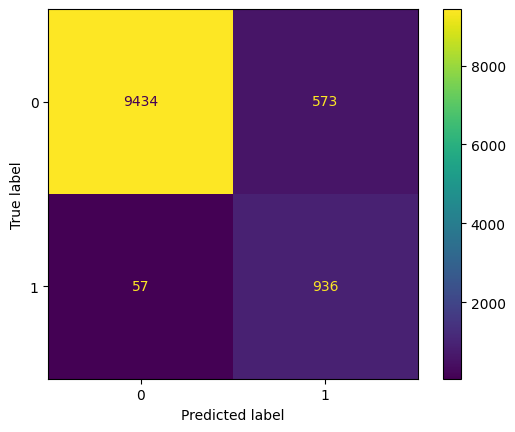

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics

X= df.drop(['Labels'], axis=1)
# X = df[['length', '#slash', 'is_https', '#dot', '#dash', 'popular_domain_in_domains', 'popular_domain_in_subdomains']]
y = df['Labels']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=67
)

# print(X_test.columns)
domains = X_test['domains']
urls = X_test['URLs']
X_test = X_test[['has_com', 'is_www','is_com','#domains','#subdomain', '#suffix', '#digits_in_domain','#digits_in_subdomain','#digits_in_url', 'length', '#slash', 'is_https', '#dot', '#dash', 'popular_domain_in_domains', 'popular_domain_in_subdomains', 'popular_suffx_in_domains', 'popular_suffix_in_subdomains']]
X_train= X_train[['has_com', 'is_www','is_com','#domains','#subdomain', '#suffix','#digits_in_domain', '#digits_in_subdomain','#digits_in_url', 'length', '#slash', 'is_https', '#dot', '#dash', 'popular_domain_in_domains', 'popular_domain_in_subdomains', 'popular_suffx_in_domains', 'popular_suffix_in_subdomains']]


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

threshold = 0.05
y_pred = (y_proba >= threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()

X_test['pred'] = y_pred
X_test['true'] = y_test
X_test['URLs'] = urls
X_test['domains'] = domains
# display(X_test[(X_test['pred']==0) & (X_test['true']==1)])



Index(['Labels', 'URLs', 'length', '#slash', '#dot', '#dash', 'is_https',
       '#digits_in_url', 'subdomain', 'domains', 'suffix', '#subdomain',
       '#domains', '#suffix', 'domain_length', 'domain_length_ratio',
       '#digits_in_domain', '#digits_in_subdomain', '#digits_in_suffix',
       'is_www', 'is_com', 'has_com', 'has_org', 'has_freaky',
       'has_country_tld', 'longest_segment', 'shortest_segment',
       'popular_domain_in_domains', 'popular_domain_in_subdomains',
       'popular_suffx_in_domains', 'popular_suffix_in_subdomains',
       'has_country_tld_in_domain', 'has_country_tld_in_suffix',
       'has_country_tld_in_subdomain'],
      dtype='object')

Accuracy: 0.9425454545454546
[[9418  583]
 [  49  950]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97     10001
           1       0.62      0.95      0.75       999

    accuracy                           0.94     11000
   macro avg       0.81      0.95      0.86     11000
weighted avg       0.96      0.94      0.95     11000



,has_country_tld_in_subdomain,has_country_tld_in_domain,has_country_tld_in_suffix,shortest_segment,longest_segment,has_freaky,has_org,domain_length_ratio,domain_length,has_country_tld,...,#dot,#dash,popular_domain_in_domains,popular_domain_in_subdomains,popular_suffx_in_domains,popular_suffix_in_subdomains,pred,true,URLs,domains
25697,0,0,0,11,11,False,0,0.361702,17,0,...,2,1,0,0,0,0,0,1,http://www.bombogadget.com/public/-/areaclient/,{bombogadget}
54921,0,0,1,2,2,False,0,0.280000,7,1,...,2,0,0,0,0,0,0,1,http://www.vs.tc/MKkN6lA4,{vs}
46906,0,0,0,12,12,False,0,0.418605,18,0,...,2,0,0,0,0,0,0,1,https://www.isfirsatibul.com/m1/NetVip/main,{isfirsatibul}
20610,0,0,0,12,12,False,0,0.281250,18,0,...,2,1,0,0,0,0,0,1,https://www.chadhapapers.com/wp-admin/maint/Id...,{chadhapapers}
36317,0,0,0,2,12,False,0,0.629630,34,0,...,3,2,0,0,0,0,0,1,https://www.hs-newrecipient-authenticate.com/L...,"{newrecipient, hs, authenticate}"
20714,0,0,0,9,9,False,0,0.283019,15,0,...,2,2,0,0,0,0,0,1,http://www.pizzamars.com/voic3einlog/voice-mai...,{pizzamars}
10440,0,0,0,7,7,False,1,0.196970,13,0,...,3,0,0,0,0,0,0,1,https://www.verbind.org/info/login/index.php?t...,{verbind}
48454,0,0,0,12,12,False,0,0.281250,18,0,...,2,1,0,0,0,0,0,1,https://www.chadhapapers.com/wp-admin/maint/Id...,{chadhapapers}
21231,0,0,0,8,8,False,0,0.200000,14,0,...,5,0,0,0,0,0,0,1,https://www.jitojiif.com/wpcontent/linkedIn.co...,{jitojiif}
26993,0,0,0,3,3,False,0,0.351351,13,0,...,3,1,0,0,0,0,0,1,https://www.lgt-plc.com/en/index.html,"{lgt, plc}"


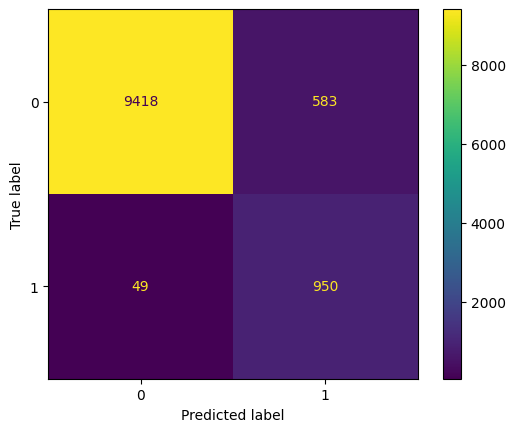

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics

display(df.columns)
X= df.drop(['Labels'], axis=1)
# X = df[['length', '#slash', 'is_https', '#dot', '#dash', 'popular_domain_in_domains', 'popular_domain_in_subdomains']]
y = df['Labels']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

# print(X_test.columns)
domains = X_test['domains']
urls = X_test['URLs']
X_test = X_test[['has_country_tld_in_subdomain', 'has_country_tld_in_domain', 'has_country_tld_in_suffix', 'shortest_segment','longest_segment','has_freaky', 'has_org', 'domain_length_ratio', 'domain_length', 'has_country_tld', 'has_com', 'is_www','is_com','#domains','#subdomain', '#suffix', '#digits_in_domain','#digits_in_subdomain','#digits_in_url', 'length', '#slash', 'is_https', '#dot', '#dash', 'popular_domain_in_domains', 'popular_domain_in_subdomains', 'popular_suffx_in_domains', 'popular_suffix_in_subdomains']]
X_train= X_train[['has_country_tld_in_subdomain', 'has_country_tld_in_domain', 'has_country_tld_in_suffix', 'shortest_segment','longest_segment','has_freaky','has_org', 'domain_length_ratio', 'domain_length', 'has_country_tld', 'has_com', 'is_www','is_com','#domains','#subdomain', '#suffix','#digits_in_domain', '#digits_in_subdomain','#digits_in_url', 'length', '#slash', 'is_https', '#dot', '#dash', 'popular_domain_in_domains', 'popular_domain_in_subdomains', 'popular_suffx_in_domains', 'popular_suffix_in_subdomains']]


model = LogisticRegression(max_iter=1000, penalty='l2')
threshold = 0.05

model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

y_pred = (y_proba >= threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()

X_test['pred'] = y_pred
X_test['true'] = y_test
X_test['URLs'] = urls
X_test['domains'] = domains
display(X_test[(X_test['pred']==0) & (X_test['true']==1)])



In [39]:
import pandas as pd

importance = pd.Series(
    model.coef_[0],
    index=X_train.columns
).sort_values(key=abs, ascending=False)

display(importance)

has_freaky                      4.893165
is_www                         -4.546353
is_https                       -1.613316
#domains                        1.244242
is_com                         -1.218404
#suffix                        -1.083010
popular_domain_in_domains      -0.922169
has_com                         0.733540
#subdomain                      0.646271
popular_suffx_in_domains        0.547045
#dash                          -0.535051
popular_domain_in_subdomains    0.458905
#digits_in_domain               0.401891
has_org                        -0.401123
has_country_tld_in_subdomain   -0.213517
#slash                          0.181360
domain_length_ratio            -0.165528
#digits_in_subdomain            0.158574
popular_suffix_in_subdomains    0.158215
has_country_tld_in_domain       0.100096
#dot                            0.069349
length                          0.025171
longest_segment                 0.024161
shortest_segment                0.024136
#digits_in_url  